<a href="https://colab.research.google.com/github/feomedeirosdev/ml-courseira/blob/main/009_EngAtributos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler,
)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CursoIA/4.Tópicos Avançados de Machine Learning/credit_simple.csv', sep=';')
df.shape

(1000, 8)

In [ ]:
target = df.columns.tolist()[-1]
features = df.columns.tolist()[:-1]
y = df[target]
X = df[features]

In [ ]:
X.isna().sum().sort_values(ascending=False)

,0
ESTADOCIVIL,8
SALDO_ATUAL,7
RESIDENCIADESDE,0
IDADE,0
OUTROSPLANOSPGTO,0
DATA,0
PROPOSITO,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SALDO_ATUAL       993 non-null    float64
 1   RESIDENCIADESDE   1000 non-null   int64  
 2   IDADE             1000 non-null   int64  
 3   OUTROSPLANOSPGTO  1000 non-null   object 
 4   DATA              1000 non-null   object 
 5   ESTADOCIVIL       992 non-null    object 
 6   PROPOSITO         1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
X['ESTADOCIVIL'].value_counts(normalize=True).reset_index()

,ESTADOCIVIL,proportion
0,masculino solteiro,0.546371
1,fem div/cas,0.310484
2,masculino casado/viuvo,0.092742
3,masculino div/sep,0.050403


In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
SALDO_ATUAL,993.0,2.425857e+07,6.883496e+08,250.0,1371.0,2323.0,3976.0,2.154441e+10
RESIDENCIADESDE,1000.0,2.845000e+00,1.103718e+00,1.0,2.0,3.0,4.0,4.000000e+00
IDADE,1000.0,3.599900e+01,1.892086e+01,0.0,27.0,33.0,42.0,4.800000e+02


In [ ]:
X['SALDO_ATUAL'].median()

2323.0

In [ ]:
float(X['SALDO_ATUAL'].mean())

24258573.44612286

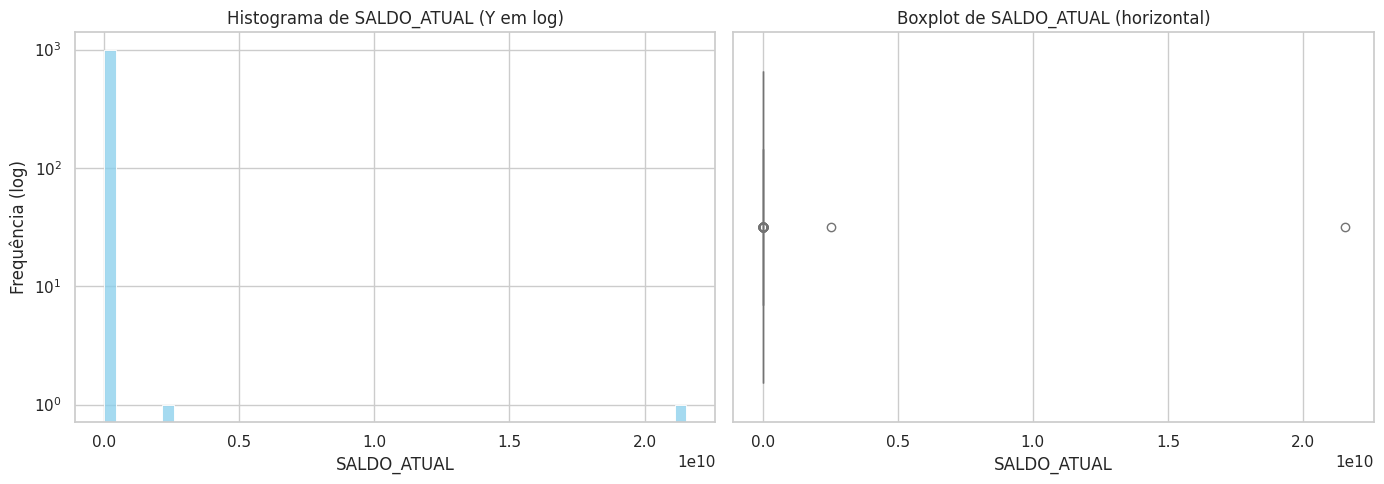

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura o estilo visual
sns.set(style="whitegrid")

# Cria a figura
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histograma com número de bins definido
sns.histplot(X['SALDO_ATUAL'], bins=50, ax=axs[0], color='skyblue')
axs[0].set_yscale('log')
axs[0].set_title('Histograma de SALDO_ATUAL (Y em log)')
axs[0].set_xlabel('SALDO_ATUAL')
axs[0].set_ylabel('Frequência (log)')

# Boxplot na horizontal
sns.boxplot(x=X['SALDO_ATUAL'], ax=axs[1], color='lightgreen', orient='h')
axs[1].set_title('Boxplot de SALDO_ATUAL (horizontal)')

plt.tight_layout()
plt.show()



In [ ]:
X[X['SALDO_ATUAL']<6_188]

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO
0,1169.0,4,67,nenhum,01/01/2019,masculino solteiro,radio/tv
1,5951.0,2,22,nenhum,01/01/2020,fem div/cas,radio/tv
2,2096.0,3,49,nenhum,02/01/2020,masculino solteiro,educação
4,4870.0,4,53,nenhum,03/01/2018,masculino solteiro,carro novo
6,2835.0,4,53,nenhum,06/01/2019,masculino solteiro,mobilia/equipamento
...,...,...,...,...,...,...,...
995,1736.0,4,31,nenhum,29/06/2018,fem div/cas,mobilia/equipamento
996,3857.0,4,40,nenhum,30/06/2018,masculino div/sep,carro usado
997,804.0,4,38,nenhum,03/07/2018,masculino solteiro,radio/tv
998,1845.0,4,23,nenhum,04/07/2019,masculino solteiro,radio/tv


In [ ]:
X[X['SALDO_ATUAL']<6_188]['SALDO_ATUAL'].mean()

np.float64(2323.6941176470586)

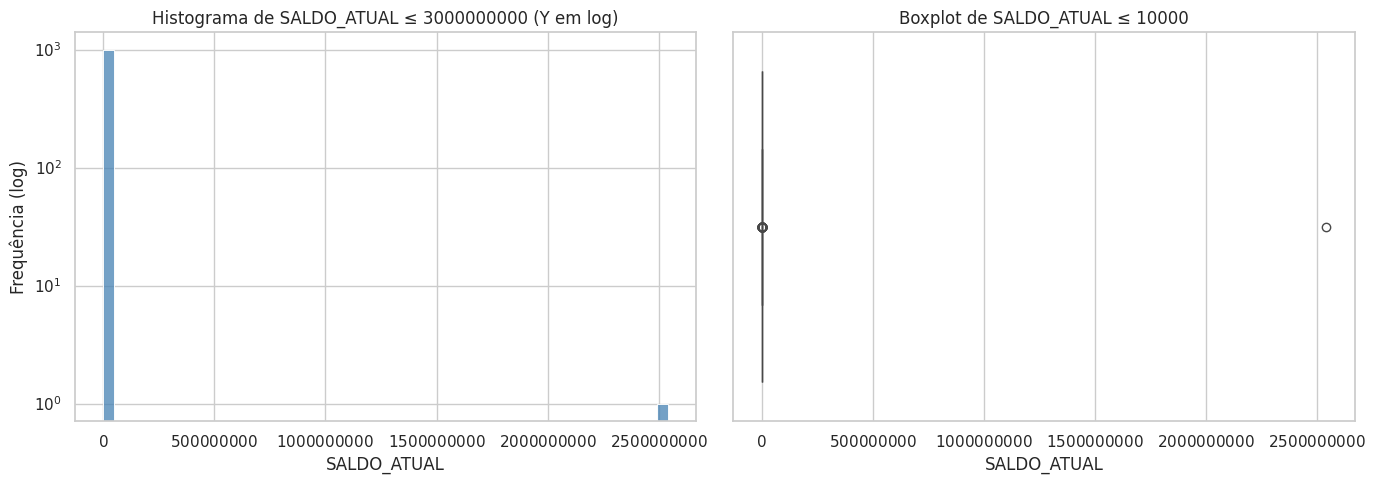

In [ ]:
from matplotlib.ticker import ScalarFormatter

sns.set(style="whitegrid")

# Filtra os dados
cut = 3_000_000_000
dados_filtrados = X['SALDO_ATUAL'].dropna()
dados_filtrados = dados_filtrados[dados_filtrados <= cut]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histograma com y-log
sns.histplot(dados_filtrados, bins=50, ax=axs[0], color='steelblue')
axs[0].set_yscale('log')
axs[0].set_title(f'Histograma de SALDO_ATUAL ≤ {cut} (Y em log)')
axs[0].set_xlabel('SALDO_ATUAL')
axs[0].set_ylabel('Frequência (log)')
axs[0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0].ticklabel_format(style='plain', axis='x')

# Boxplot horizontal
sns.boxplot(x=dados_filtrados, ax=axs[1], color='mediumseagreen', orient='h')
axs[1].set_title('Boxplot de SALDO_ATUAL ≤ 10000')
axs[1].set_xlabel('SALDO_ATUAL')
axs[1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()


In [ ]:
mediana = X['SALDO_ATUAL'].median()
X['SALDO_ATUAL'].fillna(mediana, inplace=True)
X.isna().sum().sort_values(ascending=False)

,0
ESTADOCIVIL,8
RESIDENCIADESDE,0
SALDO_ATUAL,0
IDADE,0
OUTROSPLANOSPGTO,0
DATA,0
PROPOSITO,0


In [ ]:
moda = X['ESTADOCIVIL'].mode().iloc[0]
X['ESTADOCIVIL'].fillna(moda, inplace=True)
X.isna().sum().sort_values(ascending=False)

,0
SALDO_ATUAL,0
RESIDENCIADESDE,0
IDADE,0
OUTROSPLANOSPGTO,0
DATA,0
ESTADOCIVIL,0
PROPOSITO,0


In [ ]:
X['PROPOSITO'].value_counts()

,count
PROPOSITO,
radio/tv,280
carro novo,234
mobilia/equipamento,181
carro usado,103
negócios,97
educação,50
obras,22
Eletrodomésticos,12
outros,12


In [ ]:
((df['CLASSE'].value_counts(normalize=True)*100).reset_index()).rename(columns={'proportion':'(%)'})

,CLASSE,(%)
0,bom,70.0
1,ruim,30.0


In [ ]:
df

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO,CLASSE
0,1169.0,4,67,nenhum,01/01/2019,masculino solteiro,radio/tv,bom
1,5951.0,2,22,nenhum,01/01/2020,fem div/cas,radio/tv,ruim
2,2096.0,3,49,nenhum,02/01/2020,masculino solteiro,educação,bom
3,7882.0,4,45,nenhum,02/01/2019,masculino solteiro,mobilia/equipamento,bom
4,4870.0,4,53,nenhum,03/01/2018,masculino solteiro,carro novo,ruim
...,...,...,...,...,...,...,...,...
995,1736.0,4,31,nenhum,29/06/2018,fem div/cas,mobilia/equipamento,bom
996,3857.0,4,40,nenhum,30/06/2018,masculino div/sep,carro usado,bom
997,804.0,4,38,nenhum,03/07/2018,masculino solteiro,radio/tv,bom
998,1845.0,4,23,nenhum,04/07/2019,masculino solteiro,radio/tv,ruim
